<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%AF%B8%EB%8B%88%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EB%B3%91%EC%9B%90/%EB%B3%91%EC%9B%90_%EB%85%B8%EC%87%BC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 병원 노쇼 환자 데이터 분석 실습
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
medi = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/데이터 분석/medical.csv')
print(medi.head(),'\n')
# 데이터와 컬럼 확인
medi.columns

# 정보 확인
# medi.info()

# 결측치 확인
medi.isnull().sum()
# medi.isnull().any(axis=1) # boolean 형태로 나타낼때 사용



      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.990000e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.590000e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.260000e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.680000e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.840000e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  SMS_received No-show  
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA             0      No  
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA             0      No  
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA             0      No  
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI             0      No  
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA             0      No   



PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
medi.describe()
medi = medi[medi['Age']>=0]
medi.describe()

In [ ]:
# no-show의 데이터 타입 문자형 -> 수치형으로
medi['No-Show'] = medi['No-show'].map({'Yes':1, 'No':0})  # map함수 사용 기억하기
medi['No-Show'].value_counts()

0    88207
1    22319
Name: No-Show, dtype: int64

In [ ]:
medi['ScheduledDay'] = pd.to_datetime(medi['ScheduledDay'])
medi['AppointmentDay'] = pd.to_datetime(medi['AppointmentDay'])
medi.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
SMS_received                    int64
No-show                        object
waiting_day                     int64
dtype: object

In [ ]:
# 예약한 날 - 실제 방문날 계산하여 waiting_day 컬럼 만들어 추가
# 일수차이 구하기 위해 dayofyear 사용
medi['waiting_day']=medi['AppointmentDay'].dt.dayofyear - medi['ScheduledDay'].dt.dayofyear
medi.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show,waiting_day
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,No,0
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,No,0
2,4.260000e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,No,0
3,8.680000e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,No,0
4,8.840000e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,No,0


In [ ]:
# waiting_day에 이상치 있는지 확인
# 이상치 발견되면 waiting_day가 0이상인 값만 추출하여 이상치 제거
medi = medi[medi.waiting_day>=0]
medi['waiting_day'].min()
medi.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99,  -1])

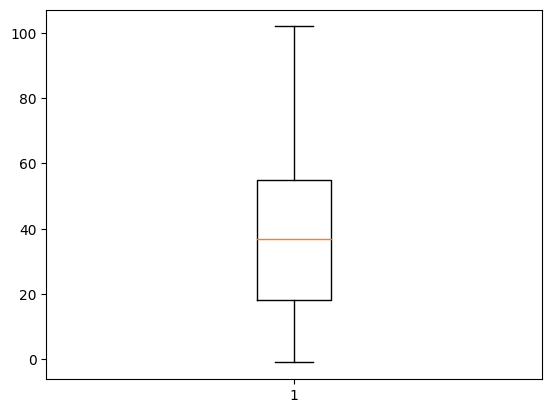

<Axes: xlabel='Age'>

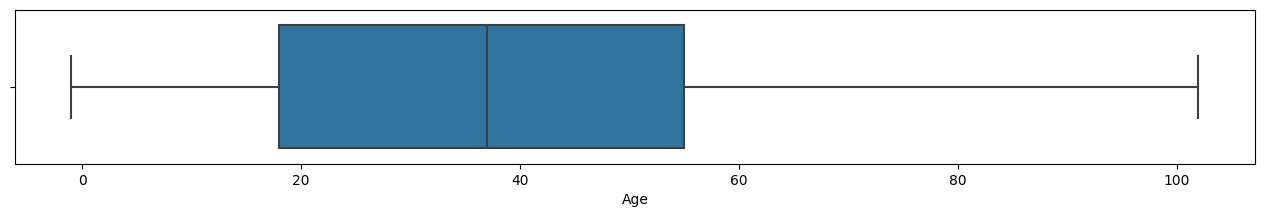

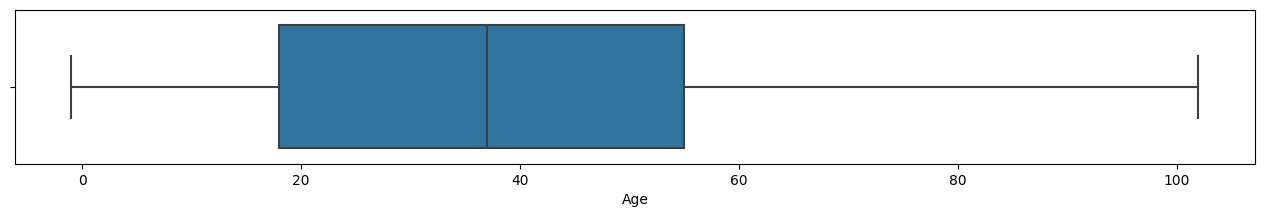

In [ ]:
# age값에서 이상 없는지 확인, boxplot으로 시각화
# age가 110보다 작거나 같은 범위만 추출하여 이상치 제거
medi = medi[medi.Age<=110]
plt.boxplot(medi['Age'])
plt.show()

# 강사님 ver.
plt.figure(figsize=(16,2))
sns.boxplot(x=medi.Age)

medi = medi[medi.Age<=110]
plt.figure(figsize=(16,2))
sns.boxplot(x=medi.Age)

In [ ]:
# 노쇼를 줄이는 것이 이번 문제의 핵심
# 어떤 변수가 노쇼와 관련 있는지 알아야 함
# waiting_day와 No-show 간의 상관관계 파악
# 당일 예약 환자가 방문하지 않은 경우 --> 당일예약건수/환자가 방문하지 않은 건수

a=medi[medi.waiting_day==0]['waiting_day'].value_counts()
b=medi[(medi['waiting_day']==0)&(medi['No-show']==1)]['waiting_day'].value_counts()
b/a

0   NaN
Name: waiting_day, dtype: float64

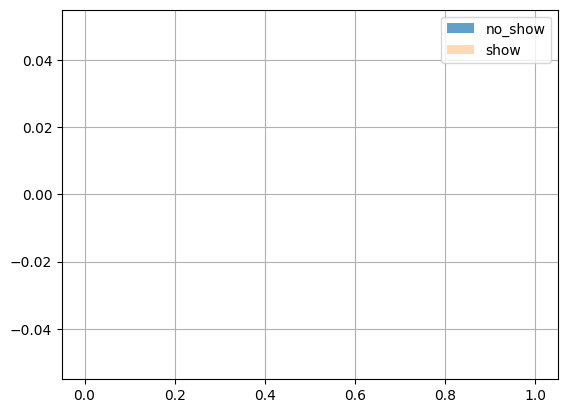

In [ ]:
# 예약 시점부터 병원방문 날까지 기다리는 날에 따라 노쇼와 노쇼가 아닌 비율이 어떻게 다른지 알기 위해 기다리는 날 10이하로 설정
# no-show가 0인 경우(병원 감)와 1인 경우(노쇼)로 데이터 분할
no_show=medi[medi['No-show']==1]
show=medi[medi['No-show']==0]

no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7,label='no_show')
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3,label='show')
plt.legend()

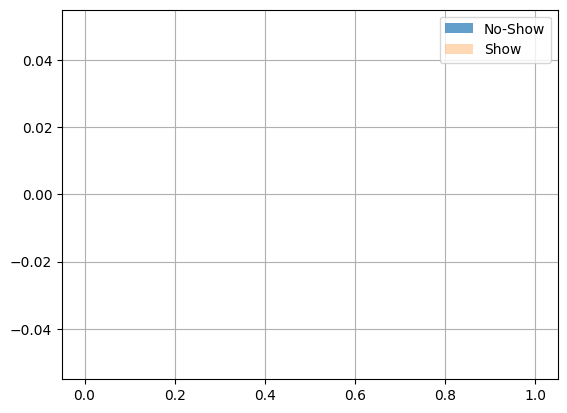

In [ ]:
#ScheduledDay와 No-show의 관계를 히스토그램으로 나타낸 후 결과 파악
no_show['ScheduledDay'].hist(alpha=0.7,label='No-Show')
show['ScheduledDay'].hist(alpha=0.3, label='Show')
plt.legend()
plt.show()

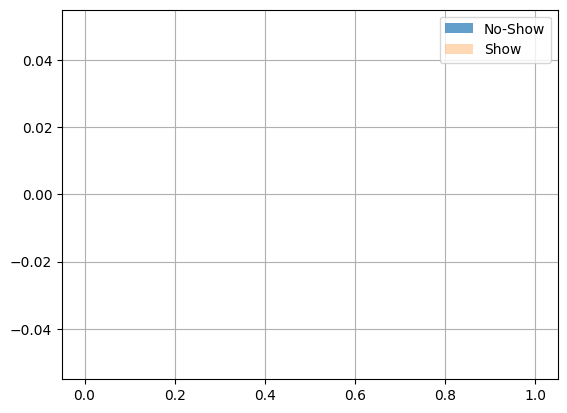

In [ ]:
#AppointmentDay와 No-show의 관계를 히스토그램으로 나타낸 후 결과 파악
no_show['AppointmentDay'].hist(alpha=0.7,label='No-Show')
show['AppointmentDay'].hist(alpha=0.3, label='Show')
plt.legend()
plt.show()

In [ ]:
# 재방문 환자와 no-show
# 병원 방문 환자 중 재방문 환자가 있는지 확인 후 재방문 환자가 예약한 날 병원에 오는 건수와 그렇지 않은 건수 비교
# no_show['PatientId'].value_counts().hist(alpha=0.7)
# show['PatientId'].value_counts().hist(alpha=0.3)
# plt.show()

# 환자별 예약횟수 파악하고 예약횟수 상위 10개만 확인(PatientId 참조)
medi.PatientId.value_counts().iloc[0:10]


8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
6.540000e+13    112
6.680000e+13    106
1.450000e+13    104
8.530000e+14    102
8.920000e+13    101
Name: PatientId, dtype: int64

<Axes: >

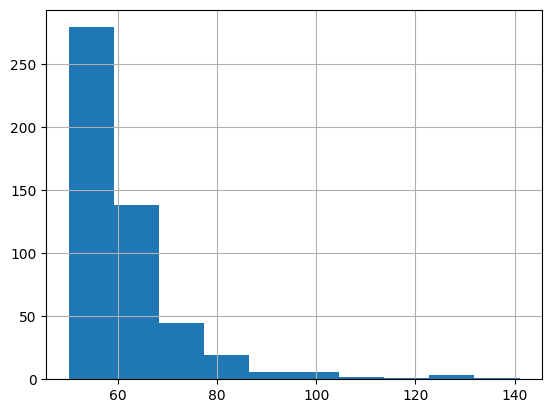

In [ ]:
# 상위 500명 히스토그램으로 나타내기
medi.PatientId.value_counts().iloc[0:500].hist()  # x축이 재방문 횟수

In [ ]:
# 환자별로 기다리는 기간 따른 노쇼 발생 건수 확인 위해
# waiting_day 일수 50일 이상으로 설정 후 결과 ㅇㅇ
medi[(medi['waiting_day']>=50) & (medi['No-show']==1)].PatientId.value_counts().iloc[0:10]

TypeError: ignored

<Axes: xlabel='SMS_received', ylabel='waiting_day'>

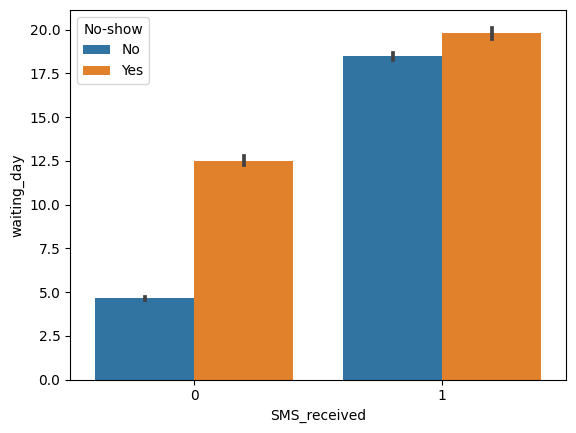

In [ ]:
sns.barplot(y='waiting_day', x='SMS_received', hue='No-show', data=medi)


<ipython-input-94-59b808f4a4af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1 = medi[['waiting_day','SMS_received','No-show']].corr()


<Axes: >

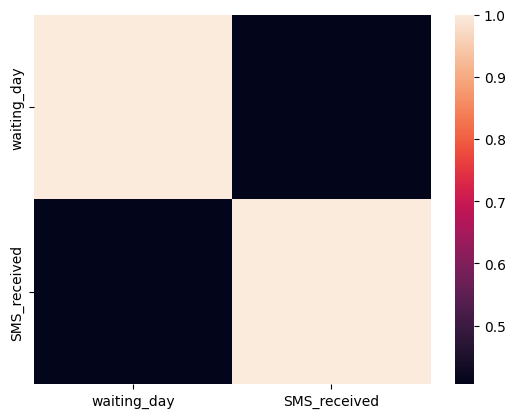

In [ ]:
data1 = medi[['waiting_day','SMS_received','No-show']].corr()
sns.heatmap(data1)


<Axes: xlabel='SMS_received', ylabel='waiting_day'>

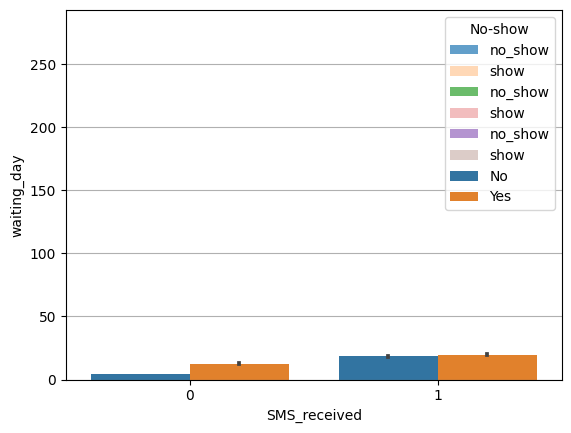

In [ ]:
# 강사님 코드
a=medi[medi.waiting_day==0]['waiting_day'].value_counts()
b=medi[(medi['waiting_day']==0)&(medi['No-show']==1)]['waiting_day'].value_counts()
b/a

no_show=medi[medi['No-show']==1]
show=medi[medi['No-show']==0]
no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7,label='no_show')
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3,label='show')
# plt.legend()

no_show['ScheduledDay'].hist(alpha=0.7,label='no_show')
show['ScheduledDay'].hist(alpha=0.3,label='show')
# plt.legend()

no_show['AppointmentDay'].hist(alpha=0.7,label='no_show')
show['AppointmentDay'].hist(alpha=0.3,label='show')
no_show
#plt.legend()

medi.PatientId.value_counts().iloc[0:10]
medi.PatientId.value_counts().iloc[0:500].hist()
medi.PatientId.value_counts().iloc[0:500]

medi[(medi['waiting_day']>=50) & (medi['No-show']==1)].PatientId.value_counts().iloc[0:10]
sns.barplot(y='waiting_day', x='SMS_received', hue='No-show', data=medi)